<a href="https://colab.research.google.com/github/AnnSenina/Python_for_DH_2023/blob/main/notebooks/%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D1%82%D0%B5%D1%82%D1%80%D0%B0%D0%B4%D0%BA%D0%B8/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F__%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# План:

1. Логистическая регрессия для бинарной классификации
2. Деревья решений (классификация)
3. Иерархический кластерный анализ
4. Метод k-means

# Важно!
Классификация и кластеризация не тождественны:

* классификация - мы заранее знаем, какие классы в наших данных есть, и пытаемся новые объекты рассортировать по этим классам

* кластеризация - мы пытаемся найти новые классы объектов, заранее не знаем, какие и сколько их

In [ ]:
# все импорты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Кластеризация

Кластерный анализ использутся, когда мы хотим найти схожие объекты в наших данных

* Кластерный анализ разбивает набор объектов на группы

* Попутно определяется число групп

Алгоритмов больше, мы посмотрим 2 основных:

* иерархический кластерный анализ: заранее неизвестно число кластеров (групп, на которые разбивается набор объектов)

* k-means: нужно определить и указать оптимальное количество кластеров

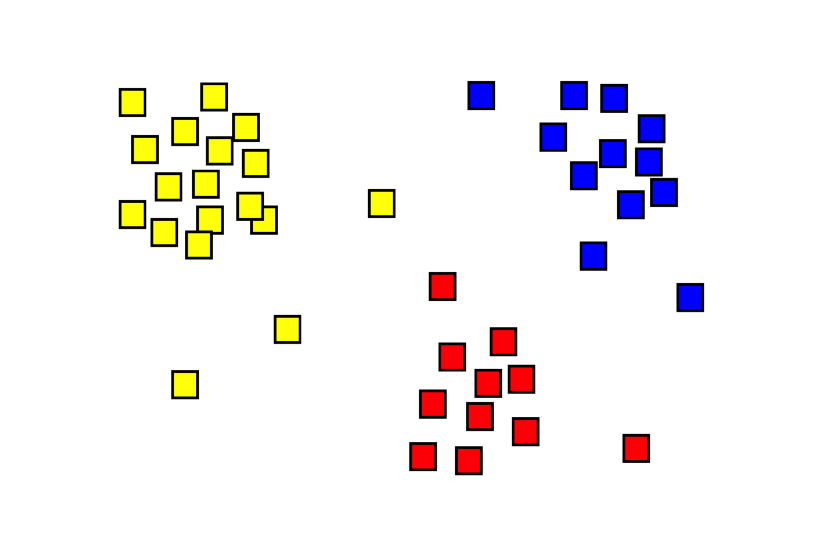

### Как читать и строить дендрограммы

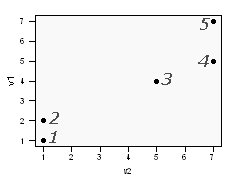

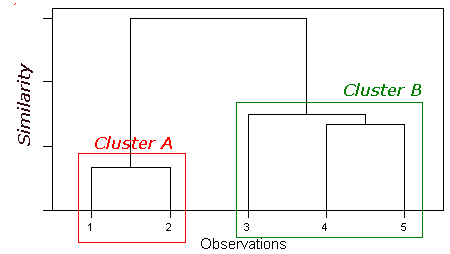

### Когда остановиться:

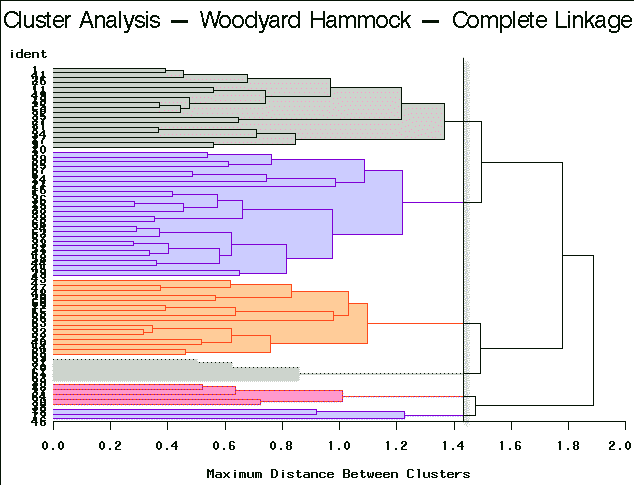

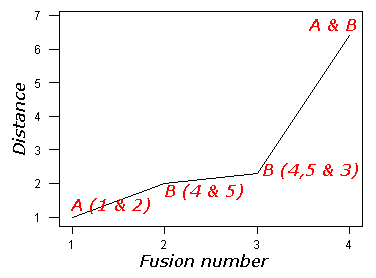

### Как потом понять, что все получилось:
Расстояние между кластерами

* **Среднее невзвешенное расстояние (Average linkage clustering) - для плотных облачков точек**
* Центроидный метод (Centroid Method)
* Метод дальнего соседа, максимального расстояния (Complete linkage clustering)
* **Метод ближайшего соседа (Single linkage clustering) - для кластеров в виде линий**
* **Метод Варда (Ward's method)**

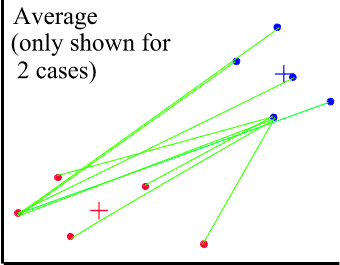

Для плотных облачков точек пододит Среднее невзвешенное расстояние, Вард

Для линий - Метод ближайшего соседа

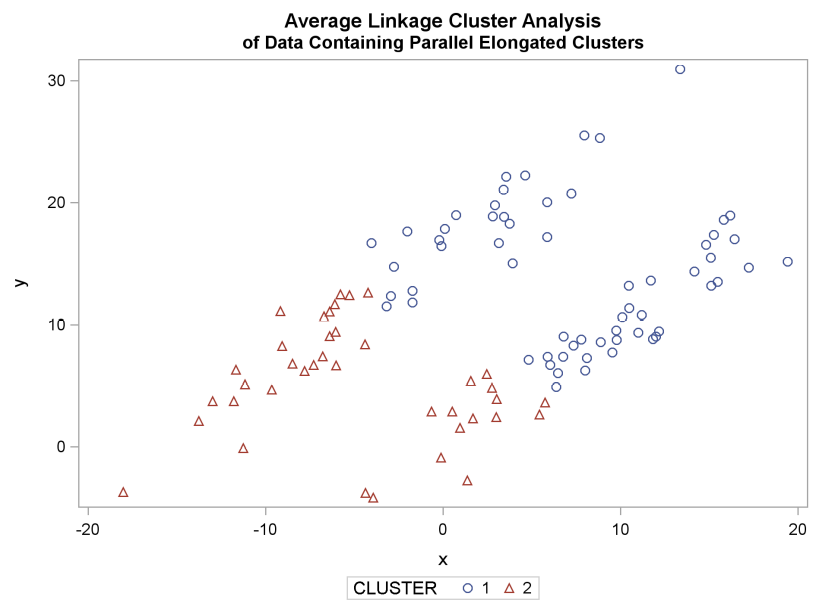

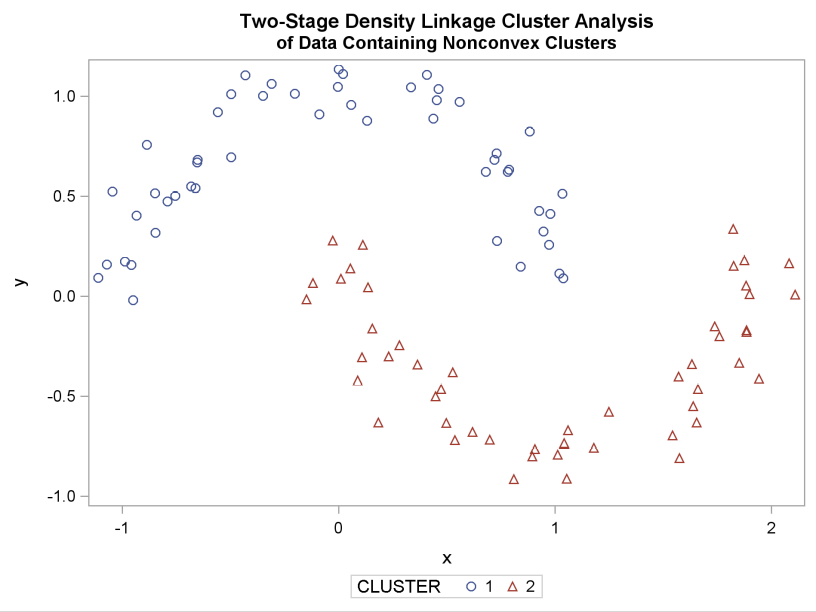

## Когда кластерный анализ прошел успешно:
* когда вы смогли понять и проинтерпретировать результат!

Проблемы:
* если в ваших данных нет кластеров, они все равно будут найдены кластерным анализом

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AnnSenina/Other/main/beverage_r.csv", sep=";", index_col='numb.obs')
df

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0
6,1,0,0,0,1,1,0,0
7,0,1,1,1,0,0,1,0
8,1,1,0,0,1,1,0,1
9,1,1,0,0,0,1,1,1


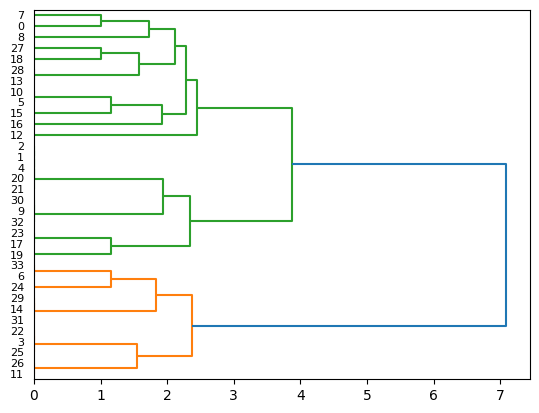

In [ ]:
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link, orientation = "right")

Важно! Цветовая раскраска - увы, не главный показатель!

Text(0, 0.5, 'Distance')

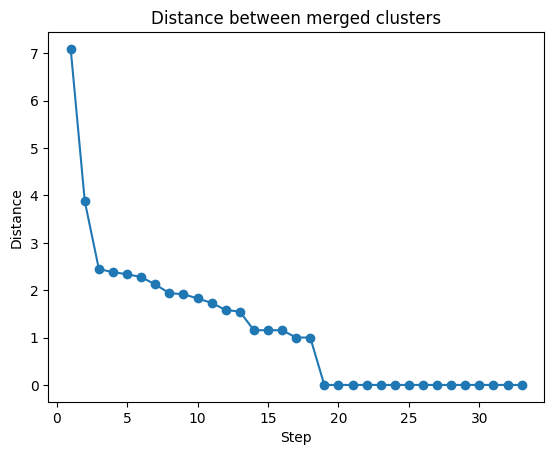

In [ ]:
# каменистая осыпь
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

plt.title('Distance between merged clusters')
plt.plot(idxs, dist_rev, marker='o')
plt.xlabel('Step')
plt.ylabel('Distance')

In [ ]:
# Останавливаем объединение, если выделили n кластеров (в данном случае три)
df['cluster'] = fcluster(link, 3, criterion='maxclust')
df

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,3
2,1,0,0,0,1,0,0,0,2
3,1,0,0,0,1,0,0,0,2
4,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,0,2
6,1,0,0,0,1,1,0,0,3
7,0,1,1,1,0,0,1,0,1
8,1,1,0,0,1,1,0,1,3
9,1,1,0,0,0,1,1,1,3


In [ ]:
df.groupby('cluster').mean()
# интерпретируем!

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000


## Теперь пример посложнее: данные требуется стандартизировать

In [ ]:
country_df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/Protein%20Consumption%20in%20Europe.csv', sep=';', decimal=',', index_col='Country')
country_df

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
E_Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5


In [ ]:
stand = preprocessing.StandardScaler()
stand.fit(country_df)

x = stand.transform(country_df)
# x - это матрица класса numpy.ndarray
# преобразуем её в DataFrame
x = pd.DataFrame(x, index=country_df.index, columns=country_df.columns)

In [ ]:
x.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


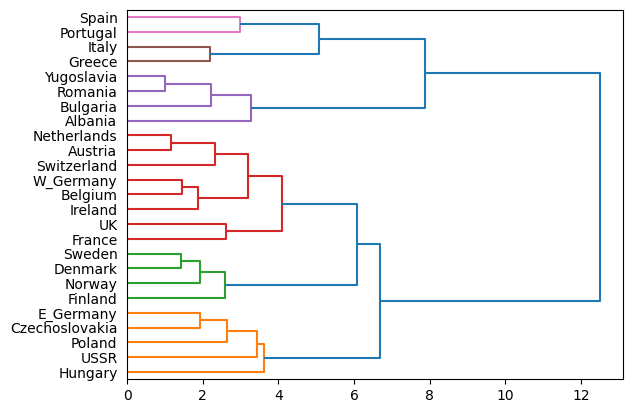

In [ ]:
link = linkage(x, 'ward', 'euclidean')
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=x.index.tolist(),
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5,
                orientation = "right",
                leaf_rotation=0.)

Text(0, 0.5, 'Distance')

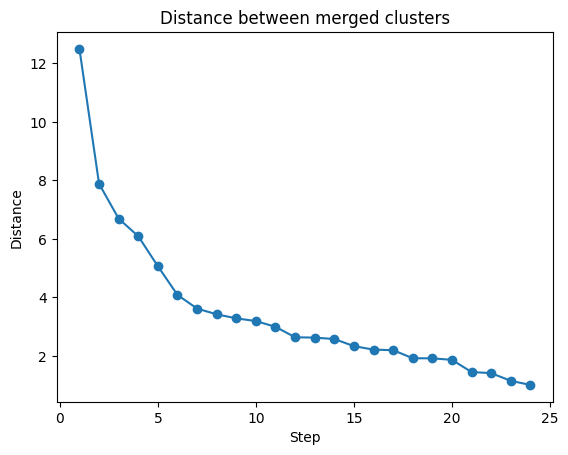

In [ ]:
# каменистая осыпь
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

plt.title('Distance between merged clusters')
plt.plot(idxs, dist_rev, marker='o')
plt.xlabel('Step')
plt.ylabel('Distance')

In [ ]:
country_df['cluster'] = fcluster(link, 5, criterion='maxclust')
country_df

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,cluster
Country,,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,4
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,3
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,4
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,2
E_Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,1
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,2
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,3


In [ ]:
country_df['cluster'].sort_values()
# Интерпретируем!

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Portugal          5
Greece            5
Spain             5
Italy             5
Name: cluster, dtype: int32

## Другой метод - k-means

В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:

* Инициализация модели, задание её параметров,

* Подгонка модели (метод fit и/или fit_transform),

* Предсказание для новых наблюдений (метод predict).

Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 2.

In [ ]:
df.head() # давайте уберем столбец с кластером, полученным прошлым способом

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,3
2,1,0,0,0,1,0,0,0,2
3,1,0,0,0,1,0,0,0,2
4,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,0,2


In [ ]:
df.columns[:-1]

Index(['COKE', 'D_COKE', 'D_PEPSI', 'D_7UP', 'PEPSI', 'SPRITE', 'TAB',
       'SEVENUP'],
      dtype='object')

In [ ]:
df = df[df.columns[:-1]]
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


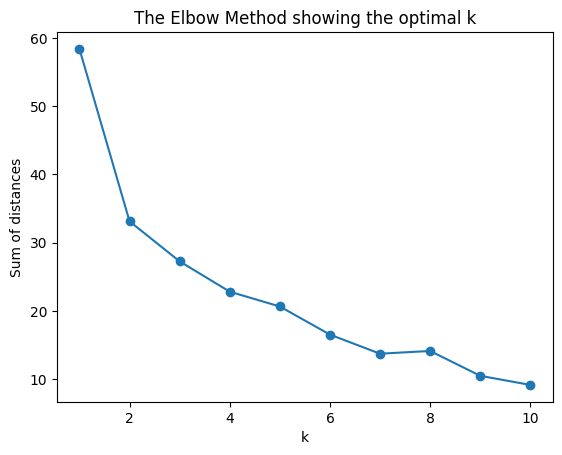

In [ ]:
K = range(1, 11)
models = [KMeans(n_clusters=k, n_init='auto').fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k');

In [ ]:
# инициализация модели
model = KMeans(n_clusters=4, n_init='auto')
model.fit(df)

KMeans(n_clusters=4, n_init='auto')

In [ ]:
# умеет предсказывать

new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

# опять хочеть видеть конкретные feature names...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2, 1], dtype=int32)

In [ ]:
new = pd.DataFrame(new_items, columns=df.columns)
newинициализация модели

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
0,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0


In [ ]:
model.predict(new)

array([2, 1], dtype=int32)

In [ ]:
# Результат кластеризации на данных df
df['cluster'] = model.labels_ # добавим номера кластеров в датафрейм

In [ ]:
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.142857,1.000000,0.428571,0.0,0.000000,0.285714,0.857143,0.142857
1,0.923077,0.230769,0.076923,0.0,0.846154,0.384615,0.000000,0.000000
2,0.000000,0.857143,0.571429,1.0,0.000000,0.142857,0.714286,0.142857
3,1.000000,0.142857,0.000000,0.0,0.714286,0.428571,0.000000,1.000000


Результат очень близкий...

## Пример со странами методом k-means

In [ ]:
country_df = country_df[country_df.columns[:-1]] # снова уберем лишний столбец с кластером
country_df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


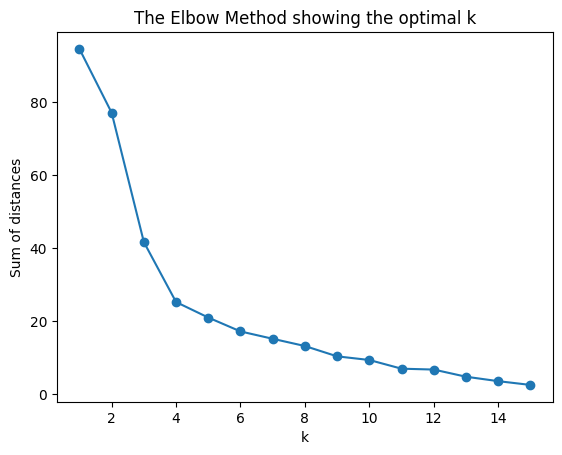

In [ ]:
K = range(1, 16)
models = [KMeans(n_clusters=k, n_init='auto').fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k');

In [ ]:
model = KMeans(n_clusters=6, n_init='auto')
model.fit(x)
country_df['cluster'] = model.labels_
country_df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
0,6.650000,3.550000,2.100000,6.750000,10.600,28.100,5.800000,5.300000,7.550000
1,11.881818,10.754545,3.736364,19.290909,3.400,26.600,4.963636,1.854545,4.327273
2,5.300000,12.400000,2.900000,9.700000,0.300,40.100,4.000000,5.400000,4.200000
3,7.560000,4.660000,1.380000,10.880000,1.200,49.620,2.840000,4.720000,2.960000
4,9.850000,7.050000,3.150000,26.675000,8.225,22.675,4.550000,1.175000,2.125000
5,9.600000,4.050000,2.850000,15.650000,4.650,39.250,2.150000,6.050000,6.600000


In [ ]:
country_df['cluster'].sort_values()

Country
Portugal          0
Spain             0
Netherlands       1
W_Germany         1
Ireland           1
Poland            1
Switzerland       1
France            1
UK                1
Czechoslovakia    1
Belgium           1
Austria           1
E_Germany         1
Hungary           2
USSR              3
Romania           3
Albania           3
Yugoslavia        3
Bulgaria          3
Sweden            4
Finland           4
Denmark           4
Norway            4
Greece            5
Italy             5
Name: cluster, dtype: int32